In [1]:
import pandas as pd

In [2]:
bom_movie_gross = pd.read_csv('bom.movie_gross.csv.gz')# imdb_name_basics = pd.read_csv('imdb.name.basics 2.csv')
# imdb_title_akas = pd.read_csv('imdb.title.akas.csv')
imdb_title_basics = pd.read_csv('imdb.title.basics.csv')
# imdb_title_principals = pd.read_csv('imdb.title.principals.csv')
imdb_title_ratings = pd.read_csv('imdb.title.ratings.csv.gz')
rt_movie_info = pd.read_csv('rt.movie_info.tsv', sep='\t')
rt_reviews = pd.read_csv('rt.reviews.tsv', sep='\t', encoding='latin_1')
tmdb_movies = pd.read_csv('tmdb.movies.csv')

In [3]:
imdb_title_basics.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [4]:
bom_movie_gross.head(2)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


In [5]:
imdb_title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [6]:
imdb_title_basics.genres.dropna()

0            Action,Crime,Drama
1               Biography,Drama
2                         Drama
3                  Comedy,Drama
4          Comedy,Drama,Fantasy
                  ...          
146138    Adventure,History,War
146139                    Drama
146140              Documentary
146141                   Comedy
146143              Documentary
Name: genres, Length: 140736, dtype: object

In [7]:
imdb_title_basics['genres'].dropna(inplace=True)

In [8]:
imdb_title_basics['num_genres'] = imdb_title_basics['genres'].map(lambda x : len(x.split(',')))

In [9]:
imdb_title_basics.sample(7)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,num_genres
14752,tt1723725,"Beautiful Tree, Severed Roots","Beautiful Tree, Severed Roots",2014,8.0,"Biography,Documentary,Drama",3.0
36383,tt2328487,20 anni,20 anni,2012,79.0,Documentary,1.0
71486,tt4080956,A Prayer Before Dawn,A Prayer Before Dawn,2017,116.0,"Biography,Crime,Drama",3.0
138591,tt8919664,Unveiling The Horse Demon,Unveiling The Horse Demon,2016,93.0,"Adventure,Fantasy,Horror",3.0
106835,tt6256984,"My Name is Batlir, not Butler","My Name is Batlir, not Butler",2018,NaN,"Comedy,Drama,Fantasy",3.0
86784,tt5036134,Nocturne,Nocturne,2016,75.0,Drama,1.0
87450,tt5076160,Buds,Buds,2015,89.0,Comedy,1.0


In [10]:
imdb_title_basics.num_genres.value_counts()

1.0    81358
2.0    29942
3.0    29436
Name: num_genres, dtype: int64

In [11]:
imdb_title_basics.num_genres.value_counts().values

array([81358, 29942, 29436])

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

<BarContainer object of 3 artists>

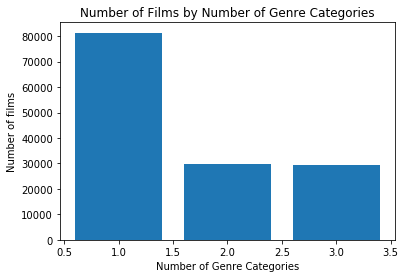

In [37]:
fig, ax = plt.subplots()

x = imdb_title_basics.num_genres.value_counts().index
y = imdb_title_basics.num_genres.value_counts()

ax.set_title('Number of Films by Number of Genre Categories')
ax.set_xlabel('Number of Genre Categories')
ax.set_ylabel('Number of films')

ax.bar(x, y)

In [14]:
movie_gross_title_basics = pd.merge(left=bom_movie_gross, right=imdb_title_basics, how='inner', left_on='title', right_on='primary_title')

In [35]:
movie_gross_title_basics[movie_gross_title_basics['num_genres'] == ]['domestic_gross'].mean()

17225643.65

In [43]:
movie_gross_title_basics.dropna(inplace=True)

In [69]:
bom_movie_gross.groupby('studio')['domestic_gross'].median().sort_values(ascending=False)[:10]

studio
P/DW       157250000.0
BV          92100000.0
Sony        63500000.0
WB (NL)     63100000.0
Fox         62150000.0
Uni.        61000000.0
Par.        57700000.0
MGM         50300000.0
WB          47250000.0
SGem        39400000.0
Name: domestic_gross, dtype: float64

<BarContainer object of 10 artists>

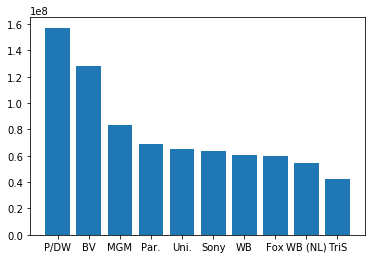

In [70]:
fig, ax = plt.subplots()

x = movie_gross_title_basics.groupby('studio')['domestic_gross'].median().sort_values(ascending=False)[:10].index
y = movie_gross_title_basics.groupby('studio')['domestic_gross'].median().sort_values(ascending=False)[:10]

# ax.set_title('Number of Films by Number of Genre Categories')
# ax.set_xlabel('Number of Genre Categories')
# ax.set_ylabel('Number of films')

ax.bar(x, y)